# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

The data is downloaded from https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip

Then we will just unzip it and it contains three files, namely, test.p, train.p and valid.p
We will then use the python pickle library to open them.

In [1]:
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import pandas as pd
import zipfile
import os

dataZip = 'traffic-signs-data.zip'
dataPath = 'traffic-signs-data'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile(dataZip):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='German Traffic Sign Dataset') as pbar:
        urlretrieve(
            'https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip',
            dataZip,
            pbar.hook)


if not isdir(dataPath):
    zip_ref = zipfile.ZipFile(dataZip, 'r')
    zip_ref.extractall(dataPath)
    zip_ref.close()


Here is the code to open those files, and parse them into three different set of images data with the associated labels.

In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data
data_dir = dataPath + '/'

training_file = data_dir + 'train.p'
validation_file = data_dir + 'valid.p'
testing_file = data_dir + 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

The following is the general summary of the data that we will be working with.

In [3]:
n_train = len(X_train)
n_validation = len(X_valid)
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Here is the possible traffic signs labels we will be working for this exercise.

In [4]:
labels = pd.read_csv('signnames.csv')['SignName']
print(labels)

0                                  Speed limit (20km/h)
1                                  Speed limit (30km/h)
2                                  Speed limit (50km/h)
3                                  Speed limit (60km/h)
4                                  Speed limit (70km/h)
5                                  Speed limit (80km/h)
6                           End of speed limit (80km/h)
7                                 Speed limit (100km/h)
8                                 Speed limit (120km/h)
9                                            No passing
10         No passing for vehicles over 3.5 metric tons
11                Right-of-way at the next intersection
12                                        Priority road
13                                                Yield
14                                                 Stop
15                                          No vehicles
16             Vehicles over 3.5 metric tons prohibited
17                                             N

### Include an exploratory visualization of the dataset

Visually display some of the images that we will be training/testing.

Go straight or right
Slippery road
Speed limit (30km/h)
Bumpy road
Speed limit (60km/h)


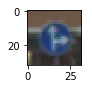

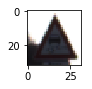

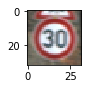

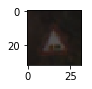

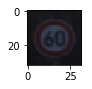

In [5]:
### Data exploration visualization code goes here.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Visualizations will be shown in the notebook.
%matplotlib inline

#index = random.randint(0, len(X_train))
for i in range(5):
    image = X_train[i*1250+900].squeeze()

    plt.figure(figsize=(1,1))
    plt.imshow(image)
    print(labels[y_train[i*1250+900]])

The following is the distribution of the training data set.

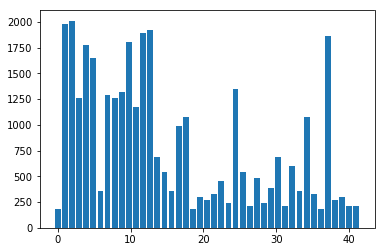

In [6]:
import numpy as np

histogram, bins = np.histogram(y_train, bins=n_classes)
width = (bins[1] - bins[0]) * 4
center = (bins[:-1] + bins[0])
plt.bar(center, histogram)
plt.show()

The following is the distribution of the validation data set

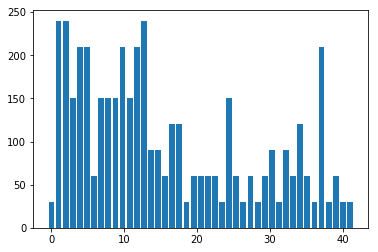

In [7]:
histogram, bins = np.histogram(y_valid, bins=n_classes)
width = (bins[1] - bins[0]) * 4
center = (bins[:-1] + bins[0])
plt.bar(center, histogram)
plt.show()

Lastly, the testing data set

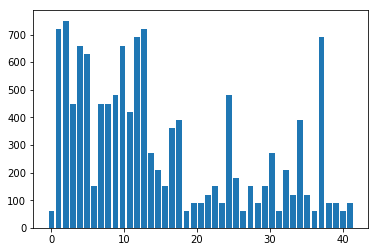

In [8]:
histogram, bins = np.histogram(y_test, bins=n_classes)
width = (bins[1] - bins[0]) * 4
center = (bins[:-1] + bins[0])
plt.bar(center, histogram)
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

# Design and Test a Model Architecture

1. Describe how you preprocessed the image data. What techniques were chosen and why did you choose these techniques? Consider including images showing the output of each preprocessing technique. Pre-processing refers to techniques such as converting to grayscale, normalization, etc. (OPTIONAL: As described in the "Stand Out Suggestions" part of the rubric, if you generated additional data for training, describe why you decided to generate additional data, how you generated the data, and provide example images of the additional data. Then describe the characteristics of the augmented training set like number of images in the set, number of images for each class, etc.)



As a first step, I decided not to convert the images to grayscale to maintain more information of the traffic sign since this Covnet can also be used for traffic light signal. The key here is to preserve as much information as I can.

The following is the implementation of the normalize function that normalize the input image data. The idea is to find the min and max value of the entire image set accross the entire RBG color spectrum and scale it down into the range between the max and min.
Next, I shuffle all the data before I process them.

In [9]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle

def normalize(x):
    _min = np.min(x)
    _max = np.max(x)
    return (x - _min)/(_max - _min)

X_train, y_train = shuffle(X_train, y_train)
X_valid, y_valid = shuffle(X_valid, y_valid)
X_test, y_test = shuffle(X_test, y_test)

X_train = normalize(X_train)
X_valid = normalize(X_valid)
X_test = normalize(X_test)

### Model Architecture

1. The model is base on the LeNet Architecture but and an additional layer of dropout. The conv_net function is the main function for CNN. Inside the conv_net function, it calls conv2d_maxpool twice. The "conv2d_maxpool function is basically a helper function for Convolutional layer with additional relu and max_pool function. And I used tensorflow higher level APIs to implement the entire conv2d_maxpool function. The padding is 'SAME' and therefore when handling data from one layer of Convolutional layer to another layer since tensorflow will automatically add the associated padding, sizeing mis-match is not an issue and impact on performance is almost not exist at all. The function is being called twice since we start with two Convolutional layer. The biggest difference between this architecture and the LeNet is the two convolutional layers have very deep output (or more channels). This this case, 64 and 254 were choosen respectivitly. This seem to improve accuracy a lot but require additional computation effort.
2. I set both conv2d_maxpool functions with kernel size of 5x5. The default max_pool size to 2x2. Strides size is set to one since we want to move kernel one pixel at a time.
3. The rest of the conv_net is basically a flatten layer follow by a three fully connected outout from LeNet. The only difference is  the first two fully connected layers, I call the tensorflow fully_connected API twice, one with activate function to 'None', which by default in tensorflow, it calls matmul, the second one, I just used the tenorflow default function, which is Relu, which is how LeNet is implemented.

Here is the overall architecture<br>
<p>
Conv2d()<br>
Add bias<br>
Relu<br>
Max pool<br>
<p>
Conv2d()<br>
Add bias<br>
Relu<br>
Max pool<br>
<p>
Flattening layer<br>
<p>
Dropout layer<br>
<p>
Linear activation<br>
Relu activation<br>
<p>
Linear activation<br>
Relu activation<br>
<p>
Linear activation<br>



Of course, this is classification problem, therefore after the above architecture, we need a softmax function and one hot encoding function to determine what has been classified!

In [10]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf

def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides = (1, 1), 
                   pool_ksize = (2, 2), pool_strides = (2, 2)):
    
    depth_int = int(x_tensor.shape[3])
    depth_out = conv_num_outputs
    
    w_shape = [*conv_ksize, depth_int, depth_out]
    weight = tf.Variable(tf.truncated_normal(w_shape, mean = 0, stddev=0.1))
    bias = tf.Variable(tf.zeros(depth_out))
    
    conv_strides = [1, *conv_strides, 1]
    pool_ksize = [1, *pool_ksize, 1]
    pool_strides = [1, *pool_strides, 1]
    
    x = tf.nn.conv2d(x_tensor, weight, strides=conv_strides, padding='SAME')
    x = tf.nn.bias_add(x, bias)
    x = tf.nn.relu(x)    
    return tf.nn.max_pool(x, pool_ksize, pool_strides, padding='SAME')

def conv_net(x, keep_prob):
    x = conv2d_maxpool(x, 64, (5, 5))
    x = conv2d_maxpool(x, 256, (5, 5))

    x = tf.contrib.layers.flatten(x)

    x = tf.nn.dropout(x, keep_prob)
    x = tf.contrib.layers.fully_connected(x, 120, activation_fn = None)
    x = tf.contrib.layers.fully_connected(x, 120)

    x = tf.contrib.layers.fully_connected(x, 84, activation_fn = None)
    x = tf.contrib.layers.fully_connected(x, 84)
    
    return tf.contrib.layers.fully_connected(x, n_classes, activation_fn = None)


After many fine tuning, the first two convolutation layers, namely, conv2d_maxpools, needs to generate very deep output to have good performance. 64, and 256 are choosen to achieve this purpose. In addition to these two parameter, epochs, learning rate, dropout probability, and batch size are also the parameters that I need to fine tune.

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

To train the model, I set the learning rate to 0.0004. The rest are simular to LeNet Architecture training strategy. The dropout rate of 0.4 was selected to avoid overfitting and generalize better. Epochs of 30 was selected since higher epochs does not seem to help improving the overall accuracy. 

In [11]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32, name = 'keep_prob')
one_hot_y = tf.one_hot(y, n_classes)
rate = 0.0004

logits = conv_net(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


The training process is basically using AdamOptimizer with the associate learning rate to minimize the cost function (loss_operation). And the cost function is defined as reduce mean of the softmax output, where this softmax layer accept input from the architecture as described above (the conv_net function).

In [12]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data, prob):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: prob})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

The evaluate function above is used to determine the performance (how accurate the classifier can perform) of the prediction. 

The Batch size of 32 was choosen after many fine tuning. smaller batch size seem to work better with better result.

In [13]:
EPOCHS = 30
BATCH_SIZE = 32
prob = 0.4

val_accuracy = []
train_accuracy = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: prob})
            
        validation_accuracy = evaluate(X_valid, y_valid, prob)
        training_accuracy = evaluate(X_train, y_train, prob)
        print("EPOCH {:2} ...   Validation Accuracy = {:.3f}".format(i+1, validation_accuracy))
        
        val_accuracy.append(validation_accuracy)
        train_accuracy.append(training_accuracy)
        
    saver.save(sess, './trafficsign_cnn')
    print("Model saved")

Training...
EPOCH  1 ...   Validation Accuracy = 0.845
EPOCH  2 ...   Validation Accuracy = 0.897
EPOCH  3 ...   Validation Accuracy = 0.893
EPOCH  4 ...   Validation Accuracy = 0.930
EPOCH  5 ...   Validation Accuracy = 0.898
EPOCH  6 ...   Validation Accuracy = 0.916
EPOCH  7 ...   Validation Accuracy = 0.921
EPOCH  8 ...   Validation Accuracy = 0.922
EPOCH  9 ...   Validation Accuracy = 0.927
EPOCH 10 ...   Validation Accuracy = 0.938
EPOCH 11 ...   Validation Accuracy = 0.938
EPOCH 12 ...   Validation Accuracy = 0.912
EPOCH 13 ...   Validation Accuracy = 0.930
EPOCH 14 ...   Validation Accuracy = 0.930
EPOCH 15 ...   Validation Accuracy = 0.921
EPOCH 16 ...   Validation Accuracy = 0.925
EPOCH 17 ...   Validation Accuracy = 0.946
EPOCH 18 ...   Validation Accuracy = 0.938
EPOCH 19 ...   Validation Accuracy = 0.941
EPOCH 20 ...   Validation Accuracy = 0.944
EPOCH 21 ...   Validation Accuracy = 0.909
EPOCH 22 ...   Validation Accuracy = 0.943
EPOCH 23 ...   Validation Accuracy = 0.940

The above output shows that once we reach the third epochs, we can already achieve above 90% accuracy. However, the next ten  epochs only show small improvment. In other word, as we increase epochs to higher value, it doesn't necessary help use achieve better result. However, to safely achieve anything above 93% accuracy, we need at least 10 epochs in general after many trials and errors and fine tuning.

In [14]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test, prob)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from .\trafficsign_cnn
Test Accuracy = 0.942


The test data seem to pretty consistant to what we got from our validation data.

The following is a plot for the training accuracy and the validation accuracy. The plot clearly shows that both training and validation data converage at about third or fourth epochs. After that they are pretty consistant. The validation accuracy is about 0.05 below the training accuracy.

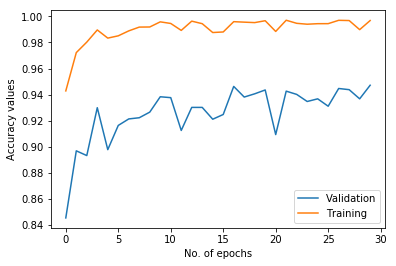

In [15]:
plt.figure(figsize=(20,20))
fig = plt.figure()

line_one, = plt.plot(val_accuracy, label='Validation')
line_two, = plt.plot(train_accuracy, label = 'Training')
plt.ylabel('Accuracy values')
plt.xlabel('No. of epochs')
plt.legend(handles=[line_one, line_two])
plt.show()


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

The images below are directly from the german traffice sign web site; http://benchmark.ini.rub.de <p>

Additional Traffic Sign Dataset: 8.19KB [00:00, 33.8KB/s]
Additional Traffic Sign Dataset: 16.4KB [00:00, 55.8KB/s]                                                              
Additional Traffic Sign Dataset: 16.4KB [00:00, 59.4KB/s]                                                              
Additional Traffic Sign Dataset: 8.19KB [00:00, 35.1KB/s]
Additional Traffic Sign Dataset: 8.19KB [00:00, 31.7KB/s]


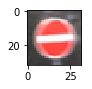

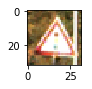

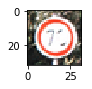

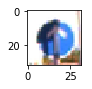

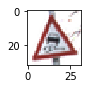

In [16]:
import PIL
from PIL import Image
import matplotlib.pyplot as plt

urls = ['http://benchmark.ini.rub.de/Images/00020_00024.jpg',
       'http://benchmark.ini.rub.de/Images/00000_00014.jpg',
       'http://benchmark.ini.rub.de/Images/00006_00028.jpg',
       'http://benchmark.ini.rub.de/Images/00008_00012.jpg',
       'http://benchmark.ini.rub.de/Images/00009_00029.jpg'
      ]
testfiles = ['testfile1.jpg', 'testfile2.jpg', 'testfile3.jpg', 'testfile4.jpg', 'testfile5.jpg']
testimages = []

for i, j in enumerate(testfiles):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='Additional Traffic Sign Dataset') as pbar:
        urlretrieve(urls[i], j, pbar.hook)

    im = Image.open(j)
    maxsize = (32, 32)
    im.thumbnail(maxsize, PIL.Image.ANTIALIAS)
    im = np.array(im.getdata(), np.uint8).reshape(im.size[1], im.size[0], 3)
    testimages.append(im)

for i in range(len(testimages)):
    plt.figure(figsize=(1,1))
    plt.imshow(testimages[i])

# https://github.com/dnkirill/stn_idsia_convn
    

### Predict the Sign Type for Each Image

The following codes are used to predict what is each of the traffic sign

In [17]:
normalize_images = normalize(testimages)

with tf.Session() as sess:
    saver = tf.train.import_meta_graph('trafficsign_cnn.meta')
    saver.restore(sess, './trafficsign_cnn')
    predict_logits = sess.run(tf.nn.softmax(logits), {x: normalize_images, keep_prob: prob})
    prediction_output = np.argmax(predict_logits, axis=1)
    
print(prediction_output)

INFO:tensorflow:Restoring parameters from ./trafficsign_cnn
[17 26  4 35 23]


And the following are what is being predicted from our network.

No entry
Traffic signals
Speed limit (70km/h)
Ahead only
Slippery road


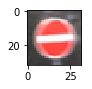

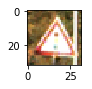

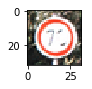

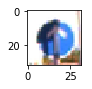

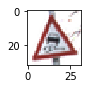

In [18]:
# Output of the above test images
for i in range(len(testimages)):
    plt.figure(figsize=(1,1))
    plt.imshow(testimages[i])
    print (labels[prediction_output[i]])


### Analyze Performance

In [19]:
actual_signs = np.array([17, 26, 4, 35, 23])

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(normalize_images, actual_signs, prob)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from .\trafficsign_cnn
Test Accuracy = 1.000


I am happy with the overall performance since I got 100% accuracy. However, five data point is a very small set of data and should not be used to claim this is 100% perfect. We do need more real life data.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [20]:
top_k = tf.nn.top_k(predict_logits, k=3)
top_k = tf.Session().run(top_k)

print(top_k)


TopKV2(values=array([[  1.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   8.37782128e-14,   4.44679727e-14],
       [  1.00000000e+00,   5.15628790e-11,   6.34218199e-12],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.00000000e+00,   2.30178611e-14,   3.51515581e-15]], dtype=float32), indices=array([[17,  0,  1],
       [26, 28, 19],
       [ 4,  2,  1],
       [35,  0,  1],
       [23, 30, 20]]))


The overall result from the top_k output shows that the first choice has much larger value than the second choice and therefore the prediction should be very confident. This should also conclude that the error margin is very small.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")